<img src="https://i.ibb.co/h8vqvKr/linear-multiclass.png">

<p style="text-align:justify">&emsp;&emsp;Pada arsitektur awalnya perceptron hanya memiliki satu node keluaran pada <i>output layer</i>. Multiclass Perceptron adalah perkembangan perceptron yang memiliki lebih dari satu node pada <i>output layer</i>nya. Ini memungkinan untuk mengklasifikasikan tiga atau lebih kategori, karena jumlah node pada <i>output layer</i> adalah sebanding dengan label data. Fungsi aktivasi yang digunakan kali ini bukan sigmoid seperti yang ada pada ilustrasi di atas, yang penulis gunakan adalah <i>Rectified Linear Unit</i>.</p>

# Impor <i>libraries</i>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

NumPy untuk operasi matriks<br>

load_iris adalah dataset iris yang akan kita gunakan<br>
train_test_split digunakan untuk memisahkan mata data uji dan data latih

# Muat <i>dataset</i>

In [2]:
data = load_iris()

In [3]:
print(data.data, "\n")
print(data.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

<i>Output</i> di atas itu gambaran'nya seperti ini ya :

<img src="https://i.ibb.co/XXf41mR/d2e337a4f6900f8d0798c596eb0607a8e0c2fbddb6a7ab7afcd60009c119d4c7.png" height=300 width=500>

0 = Setosa<br>
1 = Versicolor<br>
2 = Virginica<br>

Berikut adalah penjelasan dari dataset yang saya gunakan :

In [4]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Bagi <i>dataset</i> ke data uji dan data latih

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    test_size=0.3)

print("Jumlah data latih", len(x_train))
print("Jumlah data uji", len(x_test))

Jumlah data latih 105
Jumlah data uji 45


Oke kita jadikan 70% data sebagai data latih dan sisanya 30% jadi data uji

# Inisialisasi struktur JST

In [6]:
def nn_model(x_train, y_train):    
    return (np.random.rand(len(np.unique(y_train)), x_train.shape[1]),
            np.random.rand(len(np.unique(y_train))))

Fungsi di atas mengembalikan nilai kembalian berupa nilai bobot dan bias

# Inisialisasi fungsi aktivasi

In [7]:
def relu(x):
    return np.maximum(x, 0, x)

<img src="https://miro.medium.com/max/357/1*oePAhrm74RNnNEolprmTaQ.png">
<p style="text-align: justify">Fungsi ini akan mengembalikan nilai 0 yang apabila nilai tersebut kurang dari sama dengan 0 serta akan mengembalikan nilai yang sama dengan nilai yang diberikan apabila nilainya lebih besar dari 0. <i>Rectified Linear Unit</i> sering digunakan pada arsitektur <i>Deep Neural Network</i>, penulis sendiri lebih memilih fungsi ini daripada sigmoid karena akurasi yang dicapai lebih baik.</p>

# Inisilaisasi fungsi pelatihan untuk Multilayer Perceptron

In [8]:
def train(epochs, x_train, y_train):
    bobot, bias = nn_model(x_train, y_train)
    
    for _ in range(epochs):
        err = 0
        loss = []
    
        # FEED FORWARD
        for i, x in enumerate(x_train):
            hasil = []
        
            # KALIKAN NILAI INPUT DENGAN BOBOT
            for w in bobot:
                hasil_kali = np.dot(x,w)
                hasil.append(hasil_kali)
        
            # TAMBAHKAN NILAI HASIL PERKALIAN DENGAN BIAS
            hasil = np.array(hasil).ravel() + bias
            hasil = relu(hasil)   # AKTIVASI NILAI KELUARAN
        
            prediksi = np.argmax(hasil)   # NILAI HASIL PREDIKSI - DIAMBIL YANG PALING BESAR
            nilai_asli = y_train[i]   # NILAI ASLI
        
            # PERBARUI NILAI BOBOT JIKA NILAI HASIL PREDIKSI TIDAK SAMA DENGAN NILAI ASLI
            if prediksi != nilai_asli:
                bobot[prediksi] = bobot[prediksi] - x
                bobot[nilai_asli] = bobot[nilai_asli] + x
                err += 1
        
            loss.append(err/len(x_train))
    
    loss.reverse()
    
    return bobot, bias, loss

Fungsi latih di atas menerima argumen banyaknya jumlah epoch, data latih, label pada data latih.<br>
Nilai kembaliannya adalah bobot yang sudah terlatih, bias, dan nilai loss selama proses pelatihan

In [9]:
bobot_baru, bias, loss = train(100, x_train, y_train)

# Nilai <i>loss</i> selama pelatihan

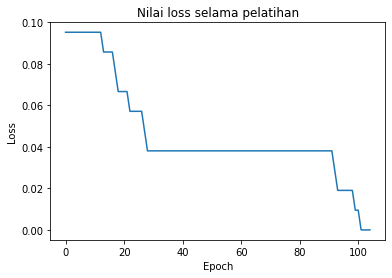

In [10]:
plt.title("Nilai loss selama pelatihan")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.plot(loss)

# Prediksi nilai pada data uji

In [11]:
def predict(x_test):
    hasil_prediksi = []

    for i, z in enumerate(x_test):
        hasil = []
    
        # KALIKAN NILAI INPUT DENGAN BOBOT YANG SUDAH TERLATIH
        for w in bobot_baru:
            hasil_kali = np.dot(z,w)
            hasil.append(hasil_kali)
        
        # TAMBAHKAN NILAI HASIL PERKALIAN DENGAN BIAS
        hasil = np.array(hasil).ravel() + bias
        hasil = relu(hasil)   # AKTIVASI NILAI KELUARAN
    
        # NILAI HASIL PREDIKSI - DIAMBIL YANG PALING BESAR
        hasil = np.argmax(hasil)
        hasil_prediksi.append(hasil)
        
    return np.ravel(hasil_prediksi)

Bandingkan nilainya :

In [12]:
hasil_prediksi = predict(x_test)
hasil_prediksi

array([0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0,
       1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,
       1])

In [13]:
y_test

array([0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0,
       1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1])

# Cek akurasi Multilayer Perceptron

In [14]:
n = 0

for i in range(len(y_test)):
    n +=1 if hasil_prediksi[i] == y_test[i] else False
    
print("akurasi :", n/len(y_test))

akurasi : 0.9555555555555556
